# Generate AusBIAS Logo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from itertools import combinations
import numpy as np
from matplotlib.collections import LineCollection
import matplotlib.font_manager as fm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patheffects as path_effects

In [3]:
def curved_line(lon1, lat1, lon2, lat2, exaggeration=0.3, steps=100):
    # Midpoint and offset
    mid_lon = (lon1 + lon2) / 2
    mid_lat = (lat1 + lat2) / 2 + exaggeration  # exaggerate curve in latitude
    lons = np.linspace(lon1, lon2, steps)
    lats = np.linspace(lat1, lat2, steps)
    curve = [(lon, lat + exaggeration * np.sin(np.pi * i / (steps - 1)))
             for i, (lon, lat) in enumerate(zip(lons, lats))]
    return zip(*curve)

### Square Logo

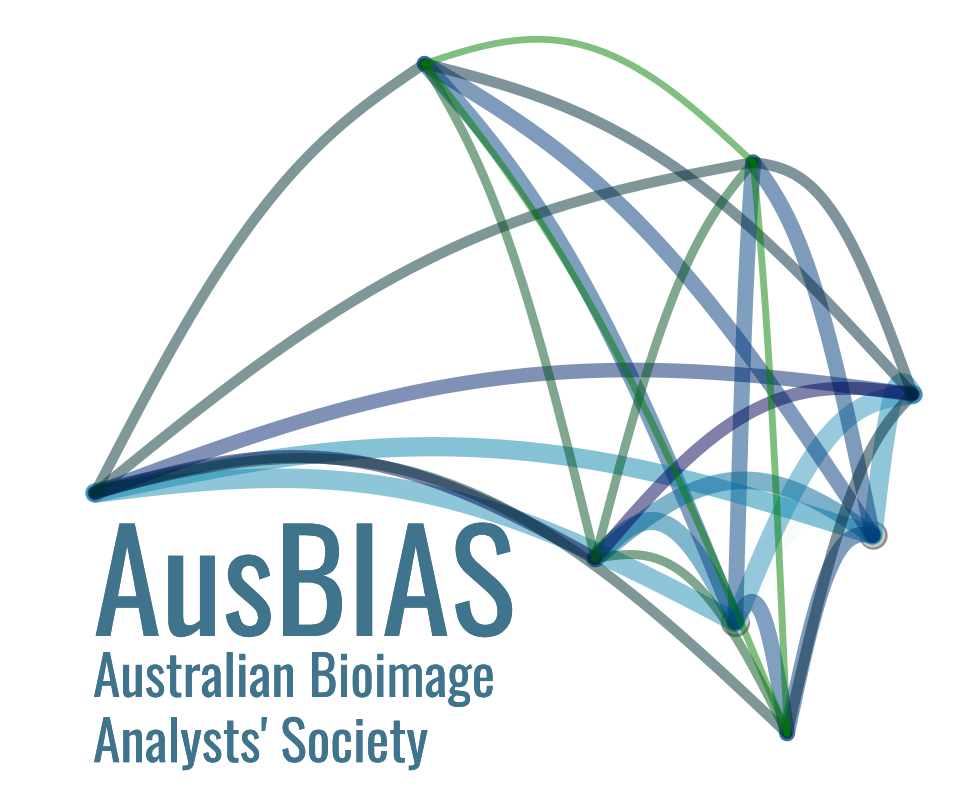

In [49]:

# === Config ===
CSV_PATH = "au.csv"
TOP_X = 10  # Adjust this as needed

# === Load Data ===
df = pd.read_csv(CSV_PATH)

city_list = ["Sydney", 
            "Melbourne", 
            "Brisbane",
            "Adelaide",
             "Perth",
             "Cairns",
             "Darwin",
             #"Canberra",
             #"Geelong",
             "Hobart"]  # 

df['city_lower'] = df['city'].str.lower()
top_cities = df[df['city_lower'].isin([c.lower() for c in city_list])]
coords = list(zip(top_cities['lng'], top_cities['lat']))
populations = top_cities['population'].values
max_pop = populations.max()

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Border?
# ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='black', alpha=1.0)

# Put points on cities
for (lon, lat), pop in zip(coords, populations):
    size = 5 + 15 * (pop / max_pop)  # scale sizes between 5 and 20
    ax.plot(lon, lat, 'o', markersize=size, color='gray', alpha=0.8, transform=ccrs.PlateCarree())


num_lines = len(list(combinations(coords, 2)))
colors = plt.cm.rainbow(np.linspace(0, 1, num_lines))
np.random.shuffle(colors)

city_names = list(top_cities['city_lower'])
pop_values = top_cities['population'].values
pop_max = (top_cities['population'] * 2).max() 

cmap = plt.get_cmap('ocean')  
pop_max = (top_cities['population'] * 2).max()  
pop_min = (top_cities['population'] * 2).min()
norm = mcolors.Normalize(vmin=pop_min, vmax=pop_max)

pop_dict = dict(zip(top_cities['city_lower'], top_cities['population']))
city_coords = dict(zip(top_cities['city_lower'], zip(top_cities['lng'], top_cities['lat'])))

segments = []
colors = []
widths = []

for name1, name2 in combinations(city_names, 2):
    lon1, lat1 = city_coords[name1]
    lon2, lat2 = city_coords[name2]
    pop1 = pop_dict[name1]
    pop2 = pop_dict[name2]
    combined_pop = pop1 + pop2

    ## Curve the perth/hobart line up to gain more title space
    if((name1=="perth" or name2=="perth") and
            (name1=="hobart" or name2=="hobart")) : 
        lons, lats = curved_line(lon1, lat1, lon2, lat2, exaggeration=6.0)
        
    else:
        lons, lats = curved_line(lon1, lat1, lon2, lat2, exaggeration=3.0)
    
    # scale lines to combined populations
    segment = list(zip(lons, lats))
    segments.append(segment)
    colors.append(cmap(norm(combined_pop)))
    widths.append(4.5 + 13.5 * (combined_pop / pop_max))

# Create LineCollection with rounded caps
lc = LineCollection(
    segments,
    colors=colors,
    linewidths=widths,
    capstyle='round',  
    transform=ccrs.PlateCarree(),
    alpha=0.5
)

ax.add_collection(lc)

# ax.set_global()
# Oops, crop to Australia :D 
ax.set_extent([112, 155, -45, -10], crs=ccrs.PlateCarree())
plt.tight_layout()
ax.set_frame_on(False)

text_effects = [path_effects.Stroke(linewidth=0, foreground='black'),
                path_effects.Normal()]

sub_text_effects = [path_effects.Stroke(linewidth=0, foreground='black'),
                path_effects.Normal()]

fontname = 'oswald-regular'
font_path = f"../assets/fonts/{fontname}.ttf"   
prop = fm.FontProperties(fname=font_path)


xloc = 0.175
yloc = .34
subtitle_offset = 0.16

main_text = fig.text(
    xloc, yloc, "AusBIAS", 
    fontsize=100, fontweight='normal', color='#3F748C', ha='left', va='top', fontproperties=prop
)
main_text.set_path_effects(text_effects)

yloc1 = yloc - subtitle_offset
sub_text = fig.text(
    xloc, yloc1, "Australian Bioimage\nAnalysts' Society", 
    fontsize=40, fontweight='bold', color='#3F748C', ha='left', va='top', fontproperties=prop
)

sub_text.set_path_effects(sub_text_effects)
plt.savefig(f"../assets/images/square_logo.png",bbox_inches='tight', dpi=300)
plt.show()


### Banner Logo (better)

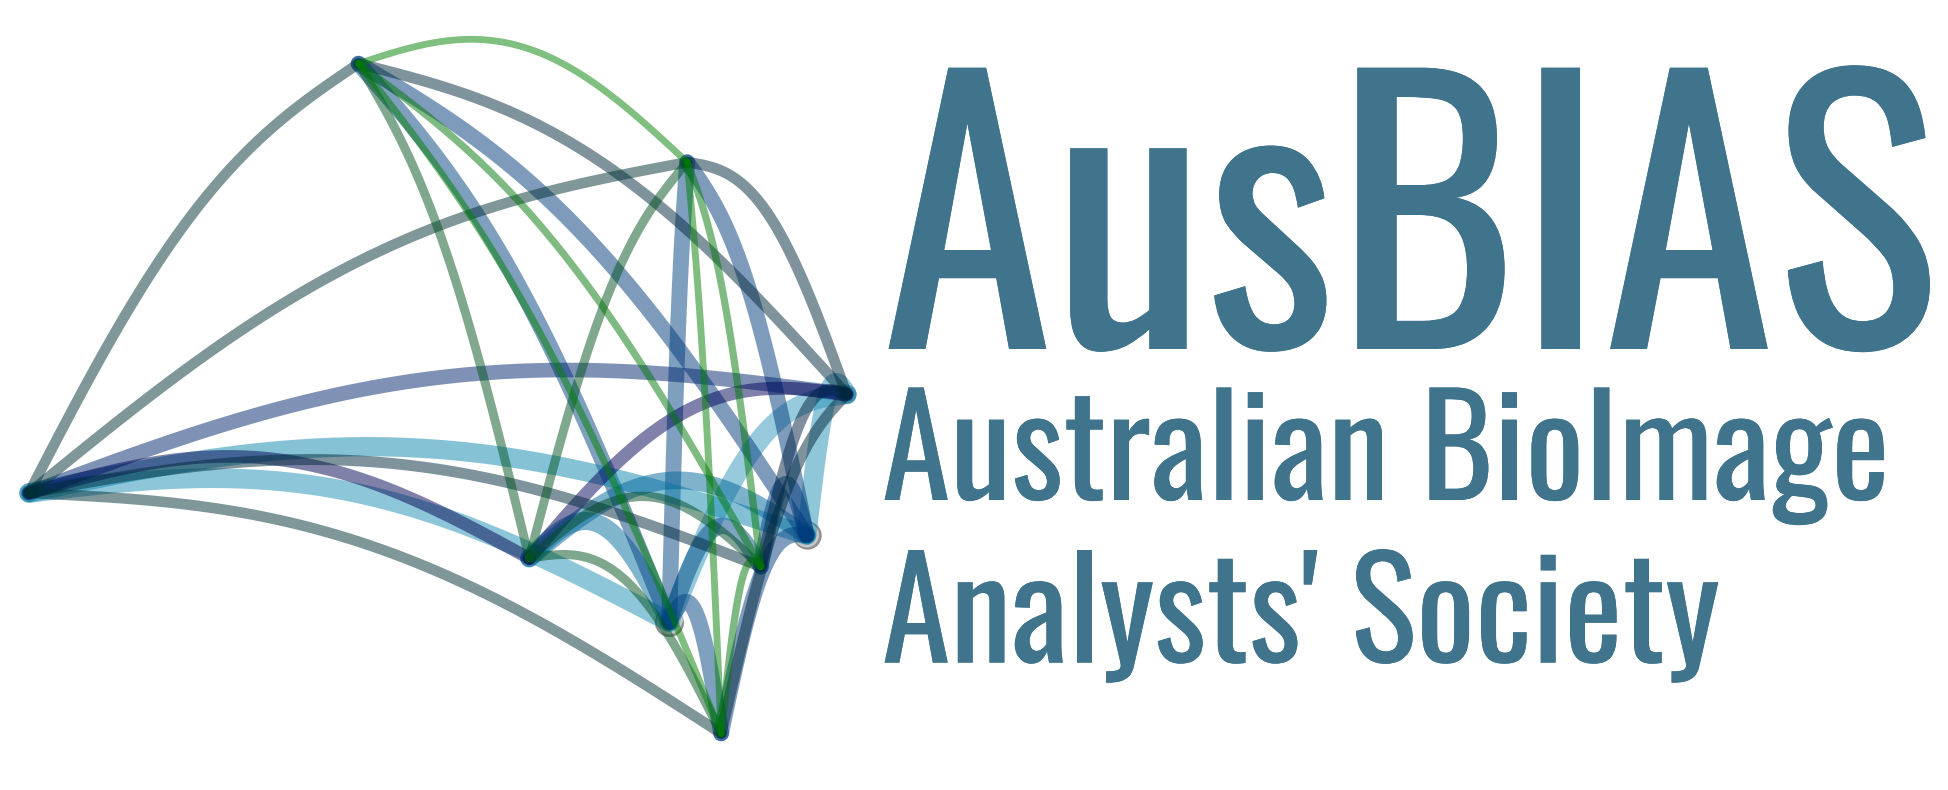

In [4]:

CSV_PATH = "au.csv"
df = pd.read_csv(CSV_PATH)

city_list = ["Sydney", 
            "Melbourne", 
            "Brisbane",
            "Adelaide",
            "Perth",
            "Cairns",
            "Darwin",
            "Canberra",
            #"Geelong",
            "Hobart"]  

df['city_lower'] = df['city'].str.lower()
top_cities = df[df['city_lower'].isin([c.lower() for c in city_list])]
coords = list(zip(top_cities['lng'], top_cities['lat']))
populations = top_cities['population'].values
max_pop = populations.max()

fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Border?
#ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='black', alpha=1.0)

# Add cities
for (lon, lat), pop in zip(coords, populations):
    size = 5 + 15 * (pop / max_pop)  
    ax.plot(lon, lat, 'o', markersize=size, color='gray', alpha=0.8, transform=ccrs.PlateCarree())


num_lines = len(list(combinations(coords, 2)))
colors = plt.cm.rainbow(np.linspace(0, 1, num_lines))
np.random.shuffle(colors)

city_names = list(top_cities['city_lower'])
pop_values = top_cities['population'].values
pop_max = (top_cities['population'] * 2).max() 

cmap = plt.get_cmap('ocean')  
pop_max = (top_cities['population'] * 2).max()  
pop_min = (top_cities['population'] * 2).min()
norm = mcolors.Normalize(vmin=pop_min, vmax=pop_max)

pop_dict = dict(zip(top_cities['city_lower'], top_cities['population']))
city_coords = dict(zip(top_cities['city_lower'], zip(top_cities['lng'], top_cities['lat'])))

segments = []
colors = []
widths = []

for name1, name2 in combinations(city_names, 2):
    lon1, lat1 = city_coords[name1]
    lon2, lat2 = city_coords[name2]
    pop1 = pop_dict[name1]
    pop2 = pop_dict[name2]
    combined_pop = pop1 + pop2
    lons, lats = curved_line(lon1, lat1, lon2, lat2, exaggeration=3.0)
    
    segment = list(zip(lons, lats))

    segments.append(segment)
    colors.append(cmap(norm(combined_pop)))
    widths.append(4.5 + 13.5 * (combined_pop / pop_max))

# Create LineCollection with rounded caps
lc = LineCollection(
    segments,
    colors=colors,
    linewidths=widths,
    capstyle='round',  # <<< Rounded ends
    transform=ccrs.PlateCarree(),
    alpha=0.5

)

ax.add_collection(lc)

# Set extent (optional — global view)
#ax.set_global()
ax.set_extent([115, 155, -45, -10], crs=ccrs.PlateCarree())
plt.tight_layout()
ax.set_frame_on(False)

# Originally had outline
text_effects = [path_effects.Stroke(linewidth=0, foreground='black'),
                path_effects.Normal()]

sub_text_effects = [path_effects.Stroke(linewidth=0, foreground='black'),
                path_effects.Normal()]

fontname = 'oswald-regular'
font_path = f"../assets/fonts/{fontname}.ttf"  
prop = fm.FontProperties(fname=font_path)

xloc = 0.67
yloc = .91
subtitle_offset = 0.16

fontscale = 2.5

main_text = fig.text(
    xloc, yloc, "AusBIAS", 
    fontsize=fontscale*100, fontweight='normal', color='#3F748C', ha='left', va='top', fontproperties=prop

)
main_text.set_path_effects(text_effects)

yloc1 = yloc - subtitle_offset*fontscale
sub_text = fig.text(
    xloc, yloc1, "Australian BioImage\nAnalysts' Society", 
    fontsize=fontscale*40, fontweight='bold', color='#3F748C', ha='left', va='top', fontproperties=prop
)

sub_text.set_path_effects(sub_text_effects)
fig.subplots_adjust(left=0.0, right=.8)
plt.savefig(f"../assets/images/banner_logo.png",bbox_inches='tight',pad_inches=.5, dpi=300,transparent=False)
plt.savefig(f"../assets/images/banner_logo_T.png",bbox_inches='tight',pad_inches=.5, dpi=300,transparent=True)
plt.show()